In [34]:
from art_api import data, preproc, utils, trainer
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input as preproc_resnet
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import os
import pandas as pd
from matplotlib import pyplot as plt

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Add new classes

In [2]:
df_add = data.DataLoader.add_img("../raw_data/google_sm")

In [3]:
df_add

,filename,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train,path,figure,building
0,NID_QUB_QUB_264-001.jpg,0,0,0,0,1,0,0,0,0,0,../raw_data/yourpaintings_sm,0,0
1,GMIII_MOSI_A1978_72_3-001.jpg,0,0,0,0,0,0,0,0,0,1,../raw_data/yourpaintings_sm,0,0
2,NY_NRM_1979_7964-001.jpg,0,0,0,0,0,0,0,0,0,1,../raw_data/yourpaintings_sm,0,0
3,CHE_CRHC_PCF40-001.jpg,0,0,0,0,0,0,0,0,0,1,../raw_data/yourpaintings_sm,0,0
4,NOT_NTMAG_1997_31-001.jpg,0,0,0,0,0,0,0,1,0,0,../raw_data/yourpaintings_sm,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13760,652_sheep_painting.jpeg,0,0,0,0,0,0,0,0,1,0,../raw_data/google_sm,0,0
13761,382_sheep_painting.jpeg,0,0,0,0,0,0,0,0,1,0,../raw_data/google_sm,0,0
13762,764_sheep_painting.jpeg,0,0,0,0,0,0,0,0,1,0,../raw_data/google_sm,0,0
13763,672_sheep_painting.jpeg,0,0,0,0,0,0,0,0,1,0,../raw_data/google_sm,0,0


In [4]:
df_add.sum()

/tmp/ipykernel_7169/3364023676.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_add.sum()


filename       NID_QUB_QUB_264-001.jpgGMIII_MOSI_A1978_72_3-0...
aeroplane                                                    758
bird                                                         888
boat                                                        2048
chair                                                       1564
cow                                                         1504
diningtable                                                 1424
dog                                                         1577
horse                                                       1608
sheep                                                       1540
train                                                       1155
figure                                                       497
building                                                     276
dtype: object

In [5]:
df_sample = preproc.sample(df_add)

276 sampled per aeroplane
276 sampled per bird
276 sampled per boat
276 sampled per chair
276 sampled per cow
276 sampled per diningtable
276 sampled per dog
276 sampled per horse
276 sampled per sheep
276 sampled per train
276 sampled per building
276 sampled per figure

dropping duplicates based on filename

After sampling, number of positive labels per class as follows: aeroplane      277
bird           307
boat           318
chair          362
cow            304
diningtable    360
dog            350
horse          332
sheep          309
train          282
figure         276
building       276
dtype: int64, number of records in df_sample = 3264


In [6]:
X, y = utils.load_add(df_sample)

In [38]:
df_sample

,filename,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train,path,figure,building
13099,398_aeroplane_painting.jpeg,1,0,0,0,0,0,0,0,0,0,../raw_data/google_sm,0,0
12122,68_aeroplane_painting.jpeg,1,0,0,0,0,0,0,0,0,0,../raw_data/google_sm,0,0
10086,464_aeroplane_painting.jpeg,1,0,0,0,0,0,0,0,0,0,../raw_data/google_sm,0,0
9391,228_aeroplane_painting.jpeg,1,0,0,0,0,0,0,0,0,0,../raw_data/google_sm,0,0
6786,LSW_CROY_M_1993_881-001.jpg,1,0,0,0,0,0,0,0,0,0,../raw_data/yourpaintings_sm,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,275_figure_painting.jpeg,0,0,0,0,0,0,0,0,0,0,../raw_data/google_sm,1,0
9524,418_figure_painting.jpeg,0,0,0,0,0,0,0,0,0,0,../raw_data/google_sm,1,0
10916,24_figure_painting.jpeg,0,0,0,0,0,0,0,0,0,0,../raw_data/google_sm,1,0
11868,131_figure_painting.jpeg,0,0,0,0,0,0,0,0,0,0,../raw_data/google_sm,1,0


In [7]:
print(X.shape)
print(y.shape)

(3264, 224, 224, 3)
(3264, 12)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [10]:
resnet_X_train = preproc_resnet(X_train) 
resnet_X_val = preproc_resnet(X_val)
resnet_X_test = preproc_resnet(X_test)

In [11]:
print(f"the shape of X_train is {X_train.shape}")
print(f"the shape of X_val is {X_val.shape}")
print(f"the shape of X_test is {X_test.shape}")
print(f"the shape of y_train is {y_train.shape}")
print(f"the shape of y_val is {y_val.shape}")
print(f"the shape of y_test is {y_test.shape}")

the shape of X_train is (2284, 224, 224, 3)
the shape of X_val is (490, 224, 224, 3)
the shape of X_test is (490, 224, 224, 3)
the shape of y_train is (2284, 12)
the shape of y_val is (490, 12)
the shape of y_test is (490, 12)


# Preload a ResNet152 model

In [8]:
model = trainer.load_resnet152_func()

2022-09-29 01:10:16.535103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-29 01:10:16.555538: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-29 01:10:16.555817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-29 01:10:16.556896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [27]:
def fit_model(model, model_name):
    print(f'Model {model_name} loaded')
    
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=optimizers.Adam(learning_rate=1e-4),
                  metrics=['accuracy'])
    model.summary()

    es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 10, 
                   verbose = 1, 
                   restore_best_weights = True)
    
    history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[es])
    
    if os.path.exists(f"../raw_data/models/{model_name}/"):
        model.save(f"../raw_data/models/{model_name}")
    else:
        os.makedirs(f"../raw_data/models/{model_name}")
        print(f"The directory for {model_name} is created.")
  
    model.save(f"../raw_data/models/{model_name}")
    print(f"Model {model_name} saved.")
    
    return model, model_name, history

In [28]:
model, model_name, history = fit_model(model, "resnet_12_classes")

Model resnet_12_classes loaded
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 2048)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 500)               4096500   
                                                                 
 dense_1 (Dense)             (None, 12)                6012      
                              

/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


72/72 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9356

/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


72/72 [==============================] - 18s 162ms/step - loss: 0.0081 - accuracy: 0.9356 - val_loss: 0.3306 - val_accuracy: 0.5816
Epoch 2/50
72/72 [==============================] - 10s 134ms/step - loss: 0.0075 - accuracy: 0.9435 - val_loss: 0.3367 - val_accuracy: 0.5694
Epoch 3/50
72/72 [==============================] - 10s 135ms/step - loss: 0.0032 - accuracy: 0.9391 - val_loss: 0.3283 - val_accuracy: 0.6122
Epoch 4/50
72/72 [==============================] - 9s 130ms/step - loss: 0.0018 - accuracy: 0.9361 - val_loss: 0.3462 - val_accuracy: 0.6061
Epoch 5/50
72/72 [==============================] - 10s 133ms/step - loss: 7.2353e-04 - accuracy: 0.9413 - val_loss: 0.3455 - val_accuracy: 0.6204
Epoch 6/50
72/72 [==============================] - 9s 131ms/step - loss: 3.2207e-04 - accuracy: 0.9396 - val_loss: 0.3498 - val_accuracy: 0.6204
Epoch 7/50
72/72 [==============================] - 10s 133ms/step - loss: 2.4601e-04 - accuracy: 0.9387 - val_loss: 0.3595 - val_accuracy: 0.6286


INFO:tensorflow:Assets written to: ../raw_data/models/resnet_12_classes/assets


INFO:tensorflow:Assets written to: ../raw_data/models/resnet_12_classes/assets


Model resnet_12_classes saved.


In [32]:
def evaluate(model, model_name, X_test, y_test):
    """
        E.g. model, y_pred = evaluate(model, model_name, X_test)
    """
    res = model.evaluate(X_test, y_test)
    res
    test_accuracy = res[-1]
    print(f"test_accuracy = {round(test_accuracy,2)*100} %")
    
    pd.DataFrame(res).to_csv(f"../raw_data/models/{model_name}/res.csv")

    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../raw_data/models/' + str(model_name) + '/' + 'accuracy.png')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../raw_data/models/' + str(model_name) + '/' + 'loss.png')
    plt.show()
    y_pred = model.predict(X_test)
    return model, y_pred, y_test

16/16 [==============================] - 2s 105ms/step - loss: 0.4592 - accuracy: 0.5347
test_accuracy = 53.0 %
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


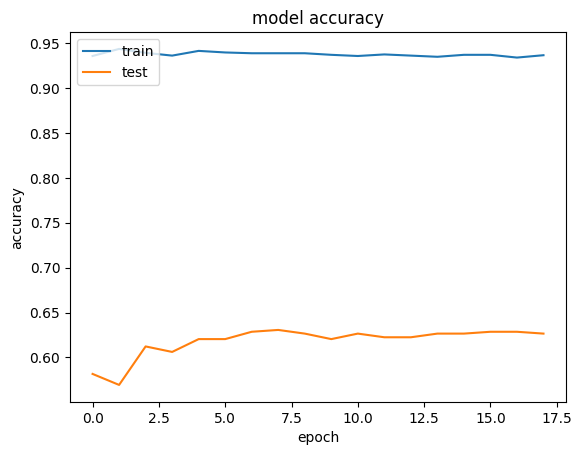

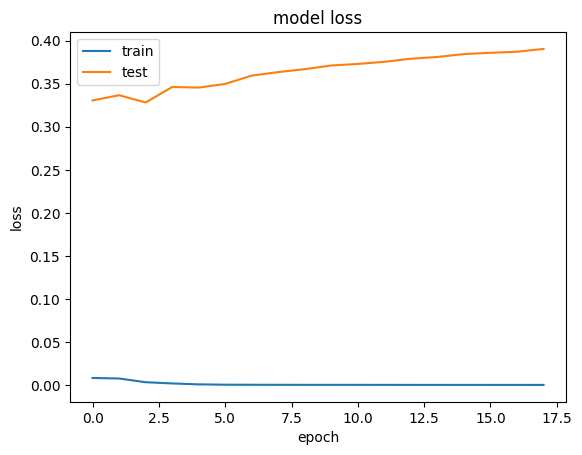

16/16 [==============================] - 3s 101ms/step


In [35]:
model, y_pred, y_test = evaluate(model, model_name, resnet_X_test, y_test)



When using 0.5 as threshold


aeroplane      35
bird           15
boat           42
chair          20
cow            29
diningtable    42
dog            20
horse          21
sheep          39
train          21
building       34
figure         24
dtype: int64


/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


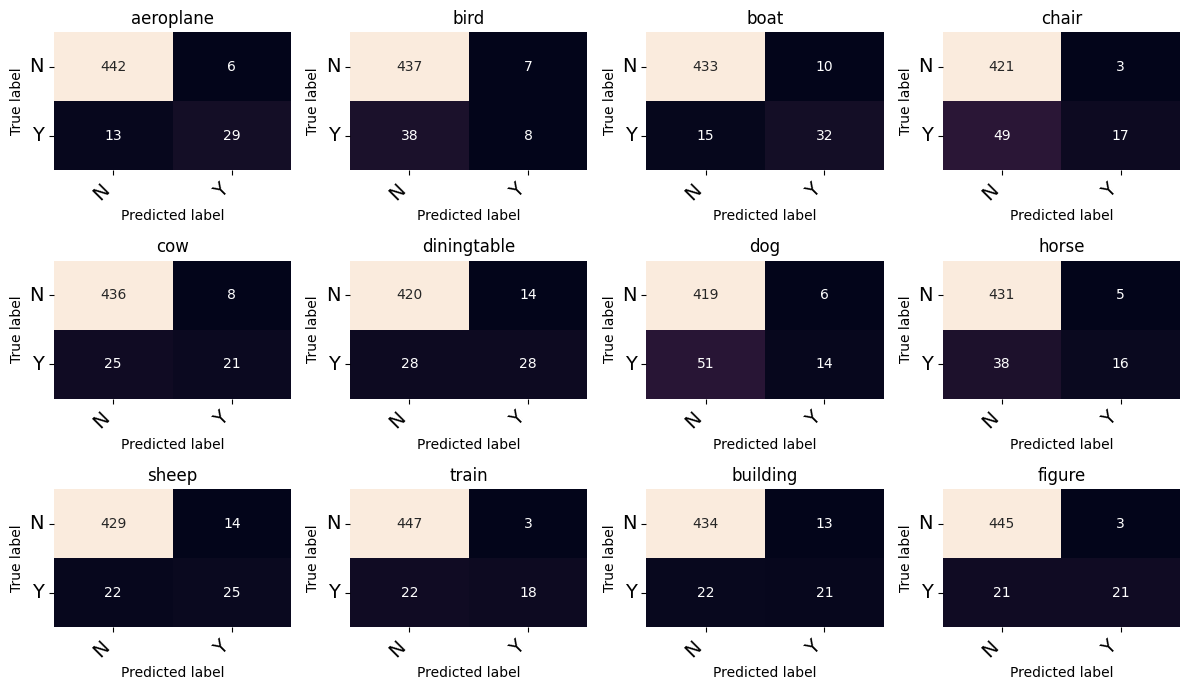



When using 0.059937477111816406 as threshold


aeroplane      54
bird           32
boat           55
chair          44
cow            48
diningtable    67
dog            29
horse          34
sheep          65
train          35
building       48
figure         34
dtype: int64


/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


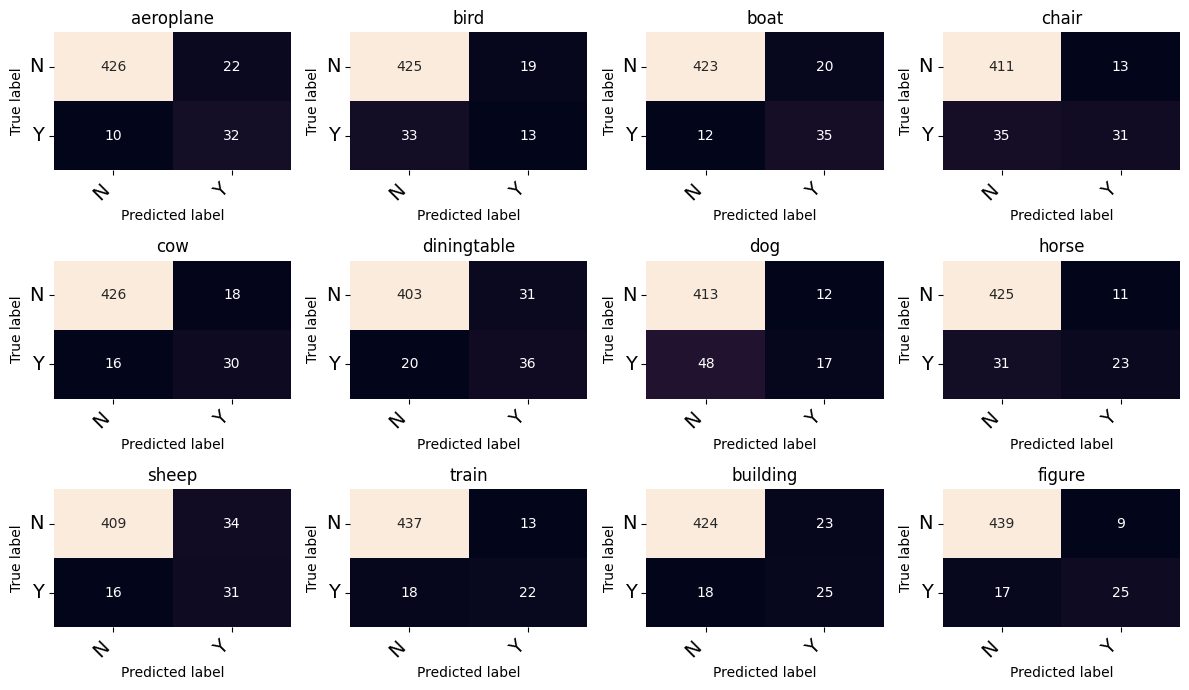



When using 6.012859557813499e-06 as threshold


aeroplane      311
bird           261
boat           232
chair          199
cow            224
diningtable    232
dog            304
horse          244
sheep          290
train          217
building       243
figure         183
dtype: int64


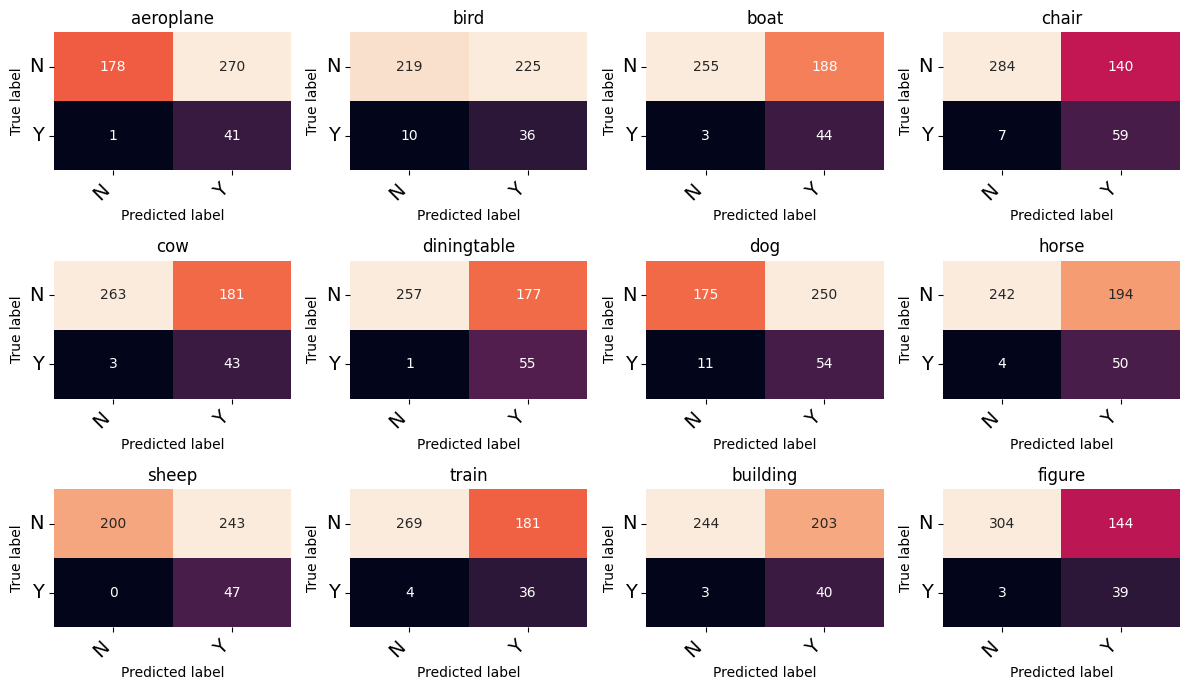

'Reports generated and saved to ../raw_data/models/resnet_12_classes'

In [37]:
trainer.generate_reports(model, model_name, y_pred, y_test)

In [ ]:
model, y_pred = trainer.evaluate(model, model_name, xception_X_test, y_test)


In [13]:
trainer.fit_model(model, "resnet_12_classes", resnet_X_train, resnet_X_val, resnet_X_test)

Model resnet_12_classes loaded
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152 (Functional)      (None, 7, 7, 2048)        58370944  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 2048)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 500)               4096500   
                                                                 
 dense_1 (Dense)             (None, 12)                6012      
                              

NameError: name 'y_train' is not defined

In [9]:
import pandas as pd
from urllib.request import Request, urlretrieve
from pathlib import Path  
import ssl
import os
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from art_api import config

In [3]:
def resize(dir, dir_sm):
    '''Resize image to 256x256 (to be implemented: if not already in local disk)
    Args: make sure you specify the relative file path,
    e.g. resize("../raw_data/test", "../raw_data/test_sm")
        dir: source directory
        dir_sm: destination directory
    Returns:
        String output describing number of images resized
    '''
    counter = 0
    for file in os.listdir(dir):
        image = Image.open(os.path.join(dir, file))
        image = image.resize((224, 224), Image.ANTIALIAS)
        if not os.path.exists(dir_sm):
            print(f"Directory does not exist. Creating {dir_sm}.")
            os.makedirs(dir_sm)
        image.save(os.path.join(dir_sm, file))
        counter +=1
    return f"{counter} images resized and rescaled to {dir_sm}"

In [4]:
resize("../raw_data/aws10k", "../raw_data/aws10k_sm")

/tmp/ipykernel_1839/2657577696.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((224, 224), Image.ANTIALIAS)


Directory does not exist. Creating ../raw_data/aws10k_sm.


'4962 images resized and rescaled to ../raw_data/aws10k_sm'

In [5]:
resize("../raw_data/google", "../raw_data/google_sm")

/tmp/ipykernel_1839/2657577696.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((224, 224), Image.ANTIALIAS)


Directory does not exist. Creating ../raw_data/google_sm.


'5512 images resized and rescaled to ../raw_data/google_sm'

In [7]:
resize("../raw_data/yourpaintings", "../raw_data/yourpaintings_sm")

/tmp/ipykernel_1839/2657577696.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((224, 224), Image.ANTIALIAS)


'8255 images resized and rescaled to ../raw_data/yourpaintings_sm'

In [2]:
from art_api import config, data, utils, preproc, trainer
import pandas as pd
from art_api import config, data, utils, preproc
import os
from google.cloud import storage
from IPython.display import Image
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, layers, models
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input as preproc_resnet
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
from keras.models import load_model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import keras

In [24]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))

In [25]:
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
# callbacks_list = [loss_history, lrate]
# history = model.fit(X_train, y_train, 
#    validation_data=(X_test, y_test), 
#    epochs=epochs, 
#    batch_size=batch_size, 
#    callbacks=callbacks_list, 
#    verbose=2)

In [ ]:
'binary_crossentropy'

In [16]:
def load_data():

    imgs = []
    df = data.DataLoader.add_img("../raw_data/google_sm")
    df_sample = preproc.sample(df)
    X, y = utils.load_add(df_sample.head(100))
    
    print(X.shape)
    print(y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
    print(f"the shape of X_train is {X_train.shape}")
    print(f"the shape of X_val is {X_val.shape}")
    print(f"the shape of X_test is {X_test.shape}")
    print(f"the shape of y_train is {y_train.shape}")
    print(f"the shape of y_val is {y_val.shape}")
    print(f"the shape of y_test is {y_test.shape}")

    print("\n\nMake sure we're using GPU\n\n")
    return X_train, X_val, X_test, y_train, y_val, y_test

In [8]:
def tuner():
    """Add to dataset with images scraped off Google +
    Augment images for training (xxx)
    + Unfree last block
    + Use batch size of 16
    """
    X_train, X_val, X_test, y_train, y_val, y_test = load_data()
    
    try:
        physical_devices = tf.config.experimental.list_physical_devices("GPU")
        if len(physical_devices) > 0:
            tf.config.experimental.set_memory_growth(physical_devices[0], True)
        os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
        print(os.getenv("TF_GPU_ALLOCATOR"))
        print(f"memory usage {tf.config.experimental.get_memory_info('GPU:0')['current'] / 10 ** 9} GB")
    except:
        pass
    
    print("\n\nFine-tune pre-trained ResNet152 model\n\n")
    
    model = load_model("../raw_data/models/resnet152")
    model_name = "tuned_resnet152_existing_test"
    model.summary()
    
    print("\n\nIndex the number of layers in the ResNet152 base\n\n")
    
    model.layers[0].summary()
    print(f"There are {len(model.layers[0].layers)} layers in the base model.")

    # freeze base, with exception of last layer
    model.trainable = True
    set_trainable = False

    for layer in model.layers[0].layers:
        if 'conv5_block3' in layer.name:
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    
    # sanity check on trainable/untrainable params in base
    model.layers[0].summary()
    
    # sanity check on trainable/untrainable params in model
    print(f"Model summary after unfreezing conv5_block3 for training")
    model.summary()

    resnet50_X_train = preproc_resnet(X_train) 
    resnet50_X_val = preproc_resnet(X_val)
    resnet50_X_test = preproc_resnet(X_test)
    
    # Custom Scheduler Function
#     lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,
#                                                               decay_steps=10000,
#                                                               decay_rate=0.9)
        
    # compile and fit the model; during trainining, augment training images, change batch size to 16
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=optimizers.Adam(learning_rate=1e-2),
                  metrics=['accuracy'])
            
    es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 30, 
                   verbose = 1, 
                   restore_best_weights = True)
    
#    callbacks_list = [loss_history, lrate, es]
    history = model.fit(resnet50_X_train, y_train, 
                    validation_data=(resnet50_X_val, y_val), 
                    epochs=150, 
                    batch_size=32, 
                    callbacks=[callbacks_list])
    
    if os.path.exists(f"../raw_data/models/{model_name}/"):
        model.save(f"../raw_data/models/{model_name}")
    else:
        os.makedirs(f"../raw_data/models/{model_name}")
        print(f"The directory for {model_name} is created.")
  
    model.save(f"../raw_data/models/{model_name}")
    print(f"Model {model_name} saved.")
    return model, model_name, history, resnet50_X_train, resnet50_X_val, resnet50_X_test

In [17]:
X_train, X_val, X_test, y_train, y_val, y_test = load_data()

758 sampled per aeroplane
758 sampled per bird
758 sampled per boat
758 sampled per chair
758 sampled per cow
758 sampled per diningtable
758 sampled per dog
758 sampled per horse
758 sampled per sheep
758 sampled per train

dropping duplicates based on filename

After sampling, number of positive labels per class as follows: aeroplane      758
bird           773
boat           843
chair          893
cow            804
diningtable    884
dog            867
horse          856
sheep          806
train          772
dtype: int64, number of records in df_sample = 7240
(100, 256, 256, 3)
(100, 10)
the shape of X_train is (70, 256, 256, 3)
the shape of X_val is (15, 256, 256, 3)
the shape of X_test is (15, 256, 256, 3)
the shape of y_train is (70, 10)
the shape of y_val is (15, 10)
the shape of y_test is (15, 10)


Make sure we're using GPU




In [18]:
model = load_model("../raw_data/models/resnet152")
model_name = "tuned_resnet152_existing_test"
model.summary()
    
print("\n\nIndex the number of layers in the ResNet152 base\n\n")
    
model.layers[0].summary()
print(f"There are {len(model.layers[0].layers)} layers in the base model.")

# freeze base, with exception of last layer
model.trainable = True
set_trainable = False

model.summary()
for layer in model.layers[0].layers:
    if 'conv5' in layer.name:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    
# sanity check on trainable/untrainable params in base
model.layers[0].summary()
    
# sanity check on trainable/untrainable params in model
print(f"Model summary after unfreezing conv5_block3 for training")
model.summary()

resnet50_X_train = preproc_resnet(X_train) 
resnet50_X_val = preproc_resnet(X_val)
resnet50_X_test = preproc_resnet(X_test)
    
#     # Custom Scheduler Function
# #     lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,
# #                                                               decay_steps=10000,
# #                                                               decay_rate=0.9)
        
#     # compile and fit the model; during trainining, augment training images, change batch size to 16
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   optimizer=optimizers.Adam(learning_rate=1e-5),
                   metrics=['accuracy'])
            
es = EarlyStopping(monitor = 'val_accuracy', 
                    mode = 'max', 
                    patience = 30, 
                    verbose = 1, 
                    restore_best_weights = True)
    
# #    callbacks_list = [loss_history, lrate, es]
history = model.fit(resnet50_X_train, y_train, 
                    validation_data=(resnet50_X_val, y_val), 
                    epochs=150, 
                    batch_size=32, 
                    callbacks=[es])
    
# if os.path.exists(f"../raw_data/models/{model_name}/"):
#     model.save(f"../raw_data/models/{model_name}")
# else:
#     os.makedirs(f"../raw_data/models/{model_name}")
#     print(f"The directory for {model_name} is created.")
    
# model.save(f"../raw_data/models/{model_name}")
# print(f"Model {model_name} saved.")
# return model, model_name, history, resnet50_X_train, resnet50_X_val, resnet50_X_test

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 8, 8, 2048)        58370944  
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0         
                                                                 
 dense_8 (Dense)             (None, 500)               65536500  
                                                                 
 dense_9 (Dense)             (None, 10)                5010      
                                                                 
Total params: 123,912,454
Trainable params: 65,541,510
Non-trainable params: 58,370,944
_________________________________________________________________


Index the number of layers in the ResNet152 base


Model: "resnet152"
____________________________________________________________________________________________

                                                                                                  
 conv2_block2_add (Add)         (None, 64, 64, 256)  0           ['conv2_block1_out[0][0]',       
                                                                  'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, 64, 64, 256)  0           ['conv2_block2_add[0][0]']       
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 64, 64, 64)   16448       ['conv2_block2_out[0][0]']       
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block2_add (Add)         (None, 32, 32, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_bn[0][0]']      
                                                                                                  
 conv3_block2_out (Activation)  (None, 32, 32, 512)  0           ['conv3_block2_add[0][0]']       
                                                                                                  
 conv3_block3_1_conv (Conv2D)   (None, 32, 32, 128)  65664       ['conv3_block2_out[0][0]']       
                                                                                                  
 conv3_block3_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block6_1_conv (Conv2D)   (None, 32, 32, 128)  65664       ['conv3_block5_out[0][0]']       
                                                                                                  
 conv3_block6_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block6_1_relu[0][0]']    
          

                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block1_1_relu[0][0]']    
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block1_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block1_2_bn[0][0]']      
 n)       

 conv4_block3_out (Activation)  (None, 16, 16, 1024  0           ['conv4_block3_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block4_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block3_out[0][0]']       
                                                                                                  
 conv4_block4_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block4_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block6_out (Activation)  (None, 16, 16, 1024  0           ['conv4_block6_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block6_out[0][0]']       
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block7_1_bn[0][0]']      
 n)       

                                )                                 'conv4_block9_3_bn[0][0]']      
                                                                                                  
 conv4_block9_out (Activation)  (None, 16, 16, 1024  0           ['conv4_block9_add[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block10_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block9_out[0][0]']       
                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block12_add (Add)        (None, 16, 16, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_bn[0][0]']     
                                                                                                  
 conv4_block12_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block12_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block13_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block12_out[0][0]']      
                                                                                                  
 conv4_block13_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block13_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block15_add (Add)        (None, 16, 16, 1024  0           ['conv4_block14_out[0][0]',      
                                )                                 'conv4_block15_3_bn[0][0]']     
                                                                                                  
 conv4_block15_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block15_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block15_out[0][0]']      
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block16_1_conv[0][0]']   
 lization)

 lization)                      )                                                                 
                                                                                                  
 conv4_block18_add (Add)        (None, 16, 16, 1024  0           ['conv4_block17_out[0][0]',      
                                )                                 'conv4_block18_3_bn[0][0]']     
                                                                                                  
 conv4_block18_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block18_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block19_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block18_out[0][0]']      
                                                                                                  
 conv4_blo

 conv4_block21_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block21_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block21_add (Add)        (None, 16, 16, 1024  0           ['conv4_block20_out[0][0]',      
                                )                                 'conv4_block21_3_bn[0][0]']     
                                                                                                  
 conv4_block21_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block21_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block22_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block21_out[0][0]']      
          

                                                                                                  
 conv4_block24_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block24_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block24_add (Add)        (None, 16, 16, 1024  0           ['conv4_block23_out[0][0]',      
                                )                                 'conv4_block24_3_bn[0][0]']     
                                                                                                  
 conv4_block24_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block24_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_blo

                                )                                                                 
                                                                                                  
 conv4_block27_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block27_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block27_add (Add)        (None, 16, 16, 1024  0           ['conv4_block26_out[0][0]',      
                                )                                 'conv4_block27_3_bn[0][0]']     
                                                                                                  
 conv4_block27_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block27_add[0][0]']      
                                )                                                                 
          

 conv4_block30_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block30_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block30_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block30_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block30_add (Add)        (None, 16, 16, 1024  0           ['conv4_block29_out[0][0]',      
                                )                                 'conv4_block30_3_bn[0][0]']     
                                                                                                  
 conv4_block30_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block30_add[0][0]']      
          

                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block33_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block33_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block33_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block33_add (Add)        (None, 16, 16, 1024  0           ['conv4_block32_out[0][0]',      
                                )                                 'conv4_block33_3_bn[0][0]']     
                                                                                                  
 conv4_blo

 on)                                                                                              
                                                                                                  
 conv4_block36_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block36_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block36_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block36_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block36_add (Add)        (None, 16, 16, 1024  0           ['conv4_block35_out[0][0]',      
                                )                                 'conv4_block36_3_bn[0][0]']     
          

                                                                                                  
 conv5_block3_2_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_3_conv (Conv2D)   (None, 8, 8, 2048)   1050624     ['conv5_block3_2_relu[0][0]']    
                                                                                                  
 conv5_block3_3_bn (BatchNormal  (None, 8, 8, 2048)  8192        ['conv5_block3_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_add (Add)         (None, 8, 8, 2048)   0           ['conv5_block2_out[0][0]',       
          

 ization)                                                                                         
                                                                                                  
 conv2_block2_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block2_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block2_1_relu[0][0]']    
                                                                                                  
 conv2_block2_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_blo

 conv3_block5_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block5_1_relu[0][0]']    
                                                                                                  
 conv3_block5_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_3_conv (Conv2D)   (None, 32, 32, 512)  66048       ['conv3_block5_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block8_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block8_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block8_3_conv (Conv2D)   (None, 32, 32, 512)  66048       ['conv3_block8_2_relu[0][0]']    
                                                                                                  
 conv3_block8_3_bn (BatchNormal  (None, 32, 32, 512)  2048       ['conv3_block8_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block8_add (Add)         (None, 32, 32, 512)  0           ['conv3_block7_out[0][0]',       
                                                                  'conv3_block8_3_bn[0][0]']      
          

 conv4_block3_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block3_1_relu[0][0]']    
                                                                                                  
 conv4_block3_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
          

                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block6_1_relu[0][0]']    
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block6_2_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block9_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block9_1_relu[0][0]']    
                                                                                                  
 conv4_block9_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block9_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block9_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block9_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block12_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block12_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block12_1_relu[0][0]']   
                                                                                                  
 conv4_block12_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block12_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block12_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block15_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block15_1_relu[0][0]']   
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block15_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block15_2_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block18_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block18_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block18_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block18_1_relu[0][0]']   
                                                                                                  
 conv4_block18_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block18_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block21_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block21_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block21_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block21_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block21_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block21_1_relu[0][0]']   
                                                                                                  
 conv4_block21_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block21_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block24_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block24_2_conv[0][0]']   
 lization)

 conv4_block27_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block26_out[0][0]']      
                                                                                                  
 conv4_block27_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block27_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block27_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block27_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block27_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block30_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block29_out[0][0]']      
                                                                                                  
 conv4_block30_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block30_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block30_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block30_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block30_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block30_1_relu[0][0]']   
          

                                )                                                                 
                                                                                                  
 conv4_block33_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block32_out[0][0]']      
                                                                                                  
 conv4_block33_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block33_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block35_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block35_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block35_out[0][0]']      
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
          

 conv5_block2_add (Add)         (None, 8, 8, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block2_add[0][0]']       
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block2_out[0][0]']       
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-09-28 20:05:10.806589: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-09-28 20:05:11.813353: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-09-28 20:05:11.814136: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-09-28 20:05:1

3/3 [==============================] - ETA: 0s - loss: 0.3137 - accuracy: 0.6000

/home/erniesg/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 12s 2s/step - loss: 0.3137 - accuracy: 0.6000 - val_loss: 0.0514 - val_accuracy: 0.8667
Epoch 2/150
3/3 [==============================] - 1s 269ms/step - loss: 0.0801 - accuracy: 0.8429 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 3/150
3/3 [==============================] - 0s 141ms/step - loss: 0.0085 - accuracy: 0.9857 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/150
3/3 [==============================] - 0s 142ms/step - loss: 0.0018 - accuracy: 0.9857 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/150
3/3 [==============================] - 0s 144ms/step - loss: 0.0011 - accuracy: 0.9857 - val_loss: 9.6381e-04 - val_accuracy: 1.0000
Epoch 6/150
3/3 [==============================] - 0s 142ms/step - loss: 7.4799e-04 - accuracy: 0.9857 - val_loss: 7.1529e-04 - val_accuracy: 1.0000
Epoch 7/150
3/3 [==============================] - 0s 141ms/step - loss: 5.6418e-04 - accuracy: 0.9857 - val_loss: 5.8280e-04 - val_accuracy: 1.0000
Epoch 8

In [11]:
for layer in model.layers:
    print(layer)

In [13]:
model.layers[0].layers

In [9]:
model, model_name, history, resnet50_X_train, resnet50_X_val, resnet50_X_test = tuner()

758 sampled per aeroplane
758 sampled per bird
758 sampled per boat
758 sampled per chair
758 sampled per cow
758 sampled per diningtable
758 sampled per dog
758 sampled per horse
758 sampled per sheep
758 sampled per train

dropping duplicates based on filename

After sampling, number of positive labels per class as follows: aeroplane      758
bird           775
boat           823
chair          869
cow            808
diningtable    895
dog            868
horse          857
sheep          794
train          770
dtype: int64, number of records in df_sample = 7237
(100, 256, 256, 3)
(100, 10)
the shape of X_train is (70, 256, 256, 3)
the shape of X_val is (15, 256, 256, 3)
the shape of X_test is (15, 256, 256, 3)
the shape of y_train is (70, 10)
the shape of y_val is (15, 10)
the shape of y_test is (15, 10)


Make sure we're using GPU


cuda_malloc_async
memory usage 0.495651024 GB


Fine-tune pre-trained ResNet152 model


Model: "sequential_4"
__________________________________________

 conv2_block2_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block2_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block2_3_conv (Conv2D)   (None, 64, 64, 256)  16640       ['conv2_block2_2_relu[0][0]']    
                                                                                                  
 conv2_block2_3_bn (BatchNormal  (None, 64, 64, 256)  1024       ['conv2_block2_3_conv[0][0]']    
 ization)                                                                                         
          

 conv3_block2_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 32, 32, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_3_bn (BatchNormal  (None, 32, 32, 512)  2048       ['conv3_block2_3_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block5_3_conv (Conv2D)   (None, 32, 32, 512)  66048       ['conv3_block5_2_relu[0][0]']    
                                                                                                  
 conv3_block5_3_bn (BatchNormal  (None, 32, 32, 512)  2048       ['conv3_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_add (Add)         (None, 32, 32, 512)  0           ['conv3_block4_out[0][0]',       
                                                                  'conv3_block5_3_bn[0][0]']      
                                                                                                  
 conv3_block5_out (Activation)  (None, 32, 32, 512)  0           ['conv3_block5_add[0][0]']       
          

                                                                                                  
 conv3_block8_add (Add)         (None, 32, 32, 512)  0           ['conv3_block7_out[0][0]',       
                                                                  'conv3_block8_3_bn[0][0]']      
                                                                                                  
 conv3_block8_out (Activation)  (None, 32, 32, 512)  0           ['conv3_block8_add[0][0]']       
                                                                                                  
 conv4_block1_1_conv (Conv2D)   (None, 16, 16, 256)  131328      ['conv3_block8_out[0][0]']       
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, 16, 16, 1024  4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block3_add (Add)         (None, 16, 16, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block6_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, 16, 16, 1024  4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block6_add (Add)         (None, 16, 16, 1024  0           ['conv4_block5_out[0][0]',       
                                )                                 'conv4_block6_3_bn[0][0]']      
          

 conv4_block9_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block9_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block9_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block9_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block9_3_bn (BatchNormal  (None, 16, 16, 1024  4096       ['conv4_block9_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block9_add (Add)         (None, 16, 16, 1024  0           ['conv4_block8_out[0][0]',       
          

                                                                                                  
 conv4_block12_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block12_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block12_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block12_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block12_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block12_3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_blo

 lization)                                                                                        
                                                                                                  
 conv4_block15_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block15_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block15_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block15_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block15_3_conv[0][0]']   
 lization)                      )                                                                 
          

 conv4_block18_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block18_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block18_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block18_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block18_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block18_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block18_3_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block18_3_conv[0][0]']   
 lization)

                                                                                                  
 conv4_block21_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block21_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block21_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block21_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block21_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block21_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_blo

 conv4_block24_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block24_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block24_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block24_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block24_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block24_2_relu[0][0]']   
                                )                                                                 
          

                                                                                                  
 conv4_block27_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block27_1_relu[0][0]']   
                                                                                                  
 conv4_block27_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block27_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block27_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block27_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block27_3_conv (Conv2D)  (None, 16, 16, 1024  263168      ['conv4_block27_2_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block30_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block30_1_relu[0][0]']   
                                                                                                  
 conv4_block30_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block30_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block30_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block30_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block36_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block36_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block36_1_relu[0][0]']   
                                                                                                  
 conv4_block36_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block36_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block36_2_bn[0][0]']     
 on)      

 conv5_block3_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, 8, 8, 512)    2359808     ['conv5_block3_1_relu[0][0]']    
                                                                                                  
 conv5_block3_2_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block3_2_conv[0][0]']    
 ization)                                                                                         
          

 ization)                                                                                         
                                                                                                  
 conv2_block2_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block2_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block2_1_relu[0][0]']    
                                                                                                  
 conv2_block2_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_blo

 conv3_block5_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block5_1_relu[0][0]']    
                                                                                                  
 conv3_block5_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_3_conv (Conv2D)   (None, 32, 32, 512)  66048       ['conv3_block5_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv3_block8_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block8_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block8_3_conv (Conv2D)   (None, 32, 32, 512)  66048       ['conv3_block8_2_relu[0][0]']    
                                                                                                  
 conv3_block8_3_bn (BatchNormal  (None, 32, 32, 512)  2048       ['conv3_block8_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block8_add (Add)         (None, 32, 32, 512)  0           ['conv3_block7_out[0][0]',       
                                                                  'conv3_block8_3_bn[0][0]']      
          

 conv4_block3_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block3_1_relu[0][0]']    
                                                                                                  
 conv4_block3_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
          

                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block6_1_relu[0][0]']    
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, 16, 16, 1024  263168      ['conv4_block6_2_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block9_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block9_1_relu[0][0]']    
                                                                                                  
 conv4_block9_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block9_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block9_2_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block9_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block12_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block12_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block12_1_relu[0][0]']   
                                                                                                  
 conv4_block12_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block12_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block12_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block15_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block15_1_relu[0][0]']   
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block15_2_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block15_2_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block18_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block18_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block18_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block18_1_relu[0][0]']   
                                                                                                  
 conv4_block18_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block18_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block21_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block21_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block21_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block21_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block21_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block21_1_relu[0][0]']   
                                                                                                  
 conv4_block21_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block21_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block24_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_2_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block24_2_conv[0][0]']   
 lization)

 conv4_block27_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block26_out[0][0]']      
                                                                                                  
 conv4_block27_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block27_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block27_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block27_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block27_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block30_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block29_out[0][0]']      
                                                                                                  
 conv4_block30_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block30_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block30_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block30_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block30_2_conv (Conv2D)  (None, 16, 16, 256)  590080      ['conv4_block30_1_relu[0][0]']   
          

                                )                                                                 
                                                                                                  
 conv4_block33_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block32_out[0][0]']      
                                                                                                  
 conv4_block33_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block33_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block35_out (Activation)  (None, 16, 16, 1024  0          ['conv4_block35_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 16, 16, 256)  262400      ['conv4_block35_out[0][0]']      
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 16, 16, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_1_relu (Activati  (None, 16, 16, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
          

 conv5_block2_add (Add)         (None, 8, 8, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block2_add[0][0]']       
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block2_out[0][0]']       
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

NameError: name 'X_train' is not defined

In [19]:
def evaluate(model, model_name, X_test, y_test):
    res = model.evaluate(X_test, y_test)
    res
    test_accuracy = res[-1]
    print(f"test_accuracy = {round(test_accuracy,2)*100} %")
        
    pd.DataFrame(res).to_csv(f"../raw_data/models/{model_name}/res.csv")

    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../raw_data/models/' + str(model_name) + '/' + 'accuracy.png')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../raw_data/models/' + str(model_name) + '/' + 'loss.png')
    plt.show()
    y_pred = model.predict(X_test)
    return model, y_pred

In [20]:
model, y_pred = evaluate(model, model_name, resnet50_X_test, y_test)
trainer.generate_reports(model, model_name, y_pred)

1/1 [==============================] - 0s 395ms/step - loss: 0.0078 - accuracy: 1.0000
test_accuracy = 100.0 %


OSError: Cannot save file into a non-existent directory: '../raw_data/models/tuned_resnet152_existing_test'